## Tidal observation site : Bournemouth   -   Timescale : 1h

### 1. Code Implementation:

In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random.seed(0)

In [2]:
def read_data(filename):
    
    # read data from files into list
    
    # create three sequences
    index = []
    hour = []
    elevation = []
    
    # open file
    infile = open(filename, "r")
    
    for line in infile:
        numbers = line.split()
        
        if len(numbers) !=5:
            continue
            
        cycle = float(numbers[0])
        height = float(numbers[3])
    
        index.append(cycle)
        hour.append((cycle - 1)/ 4)
        elevation.append(height)
    
    return index, hour, elevation

In [3]:
def list_transform_csv(Index, Hour, Elevation, scale, number):    
    
    # transform list into csv    
    
    # slice three sequences according to timescale
    column_1 = Index[scale:number:scale]
    column_2 = Hour[scale:number:scale]
    column_3 = Elevation[scale:number:scale]
    
    # define name of sequences
    name =['Cycle', 'Hour', 'Elevation']
    
    # define csv
    combine_list = []
    
    for i in range(len(column_1)):
        combine_list.append([column_1[i], column_2[i], column_3[i]])
    
    data_csv = pd.DataFrame(columns = name, data = combine_list)

    return data_csv

In [4]:
def onefigure_plot(start, end, x_axis, y_axis, colour, label_name, title_name, True_or_False):
    
    # plot one figure
    
    fig, ax1 = plt.subplots(1, figsize=(15, 5))
    fig.tight_layout(w_pad=4)
    
    # draw a graph of one data  
    ax1.plot(np.array(x_axis), np.array(y_axis), colour, label = label_name, markersize=5)

    # set legend information
    ax1.set_ylim([start, end]);
    ax1.set_xlabel('Hours (h)', fontsize=16)
    ax1.set_ylabel('Tidal elevation (m)', fontsize=16)
    ax1.set_title(title_name, fontsize=16)
    ax1.legend(loc='best', fontsize=14)
    
    # add grid or not
    ax1.grid(True_or_False)
    
    return 'one figure plot'

In [5]:
def twofigure_plot(start, end, x_axis1, y_axis1, colour1, label_name1, x_axis2, y_axis2, colour2, label_name2, title_name, True_or_False):
    
    # plot two figures  
    
    fig, ax1 = plt.subplots(1, figsize=(15, 5))
    fig.tight_layout(w_pad=4)
    
    # draw a graph of two kinds of data 
    ax1.plot(np.array(x_axis1), np.array(y_axis1), colour1, label = label_name1, markersize=5)
    ax1.plot(np.array(x_axis2), np.array(y_axis2), colour2, label = label_name2, markersize=5)
    
    # set legend information
    ax1.set_ylim([start, end]);
    ax1.set_xlabel('Hours (h)', fontsize=16)
    ax1.set_ylabel('Tidal elevation (m)', fontsize=16)
    ax1.set_title(title_name, fontsize=16)
    ax1.legend(loc='best', fontsize=14)

    # add grid or not
    ax1.grid(True_or_False)
    
    return 'two figures plot'

In [6]:
def data_smooth(input_data):
    
    # make the data curve smooth    
    
    # define the differnece sequence
    difference = input_data.diff().dropna()
    
    # define description of the sequence
    information = difference.describe()
    
    # define maximum normal value
    high_value = information['75%'] * 0.75
    
    # define minimum normal value
    low_value = information['25%'] * 1.5
    
    # define index of abnormal values
    abnormal_index = difference[(difference > high_value) | (difference < low_value)].index
    
    i = 0 
    data = np.array(input_data)
    while i < len(abnormal_index):
        
        # find how many continuous abnormal values
        n = 1
        
        # the starting index of the abnormal values
        start = abnormal_index[i]
        if (i+n) < len(abnormal_index):   
            
            while abnormal_index[i+n] == (start + n):
                n += 1
                
                if (i+n) >= len(abnormal_index):
                    break                
        i += n - 1
        
        # the ending index of the abnormal values
        end = abnormal_index[i]
        
        # fill abnormal values with appropriate values
        padding = input_data[start - 1]
        value = np.linspace(padding, padding, n)
        data[start:end+1] = value
        i += 1

    return data

In [7]:
def data_normalization(input_data):
    
    # normalize the input data
    
    # create normalization data list
    new_data = []
    
    # define description of the input data
    information = input_data.describe()
    
    # new_data = (old_data - old_data_min)/(old_data_max - old_data_min)
    for i in input_data:
         new_data.append((i - information['min']) / (information['max'] - information['min']))
    
    return np.array(new_data)

In [8]:
class BP_Neural_Network:
    
    # back propagation nerual network algorithm
    
    def __init__(self):
        
        # define the number of input/ hidden/ output neurons        
        self.input_number = 0
        self.hidden_number = 0
        self.output_number = 0
        
        # define input/ hidden/ output data        
        self.input_cells = []
        self.hidden_cells = []
        self.output_cells = []
        
        # define the initial input/ hidden weights
        self.input_weights = []
        self.hidden_weights = []
        
        # define the modified input/ hidden weights
        self.input_modify = []
        self.hidden_modify = []
        
                
    def sigmoid(self, x):
        
        # sigmoid function
        # 1 / (1 + e^(-x))
        return 1.0 / (1.0 + math.exp(-x))


    def sigmoid_derivative(self, x):
        
        # sigmoid derivative function
        # sigmoid * (1 - sigmoid)
        return x * (1 - x)


    def rand_interval(self, start, end):
        
        # define random number
        return (end - start) * random.random() + start


    def weights_matrix(self, neuron_input, neuron_output, initial_fill=0.0):
        
        # define weights matrix
        create_matrix = []
        
        for i in range(neuron_input):
            create_matrix.append([initial_fill] * neuron_output)
            
        return create_matrix

    
    def initial_setup(self, input_number, hidden_number, output_number):
        
        # initial the number of input/ hidden/ output neurons
        self.input_number = input_number + 1
        self.hidden_number = hidden_number
        self.output_number =  output_number
        
        # initial input/ hidden/ output cells
        self.input_cells = [1.0] * self.input_number
        self.hidden_cells = [1.0] * self.hidden_number
        self.output_cells = [1.0] * self.output_number
        
        # random initial input weights
        self.input_weights = self.weights_matrix(self.input_number, self.hidden_number)
        
        for i in range(self.input_number):            
            for j in range(self.hidden_number):
                self.input_weights[i][j] = self.rand_interval(-0.2, 0.2)
                
        # random initial hidden weights 
        self.hidden_weights = self.weights_matrix(self.hidden_number, self.output_number)
        
        for j in range(self.hidden_number):            
            for k in range(self.output_number):
                self.hidden_weights[j][k] = self.rand_interval(-0.2, 0.2)
        
        # initial modified input/ hidden weights
        self.input_modify = self.weights_matrix(self.input_number, self.hidden_number)
        self.hidden_modify = self.weights_matrix(self.hidden_number, self.output_number)
        

    def predict(self, input_data):
        
        # activate the input layer
        for i in range(self.input_number - 1):
            self.input_cells[i] = input_data[i]
            
        # activate the hidden layer    
        for j in range(self.hidden_number):
            sum_hidden = 0.0
            
            for i in range(self.input_number):
                sum_hidden += self.input_cells[i] * self.input_weights[i][j]
            self.hidden_cells[j] = self.sigmoid(sum_hidden)
            
        # activate the output layer
        for k in range(self.output_number):
            sum_output = 0.0
            
            for j in range(self.hidden_number):
                sum_output += self.hidden_cells[j] * self.hidden_weights[j][k]
            self.output_cells[k] = self.sigmoid(sum_output)
            
        return self.output_cells[:]
    

    def back_propagate(self, learning_sample, sample_label, learning_rate, momentum):
        
        # feed forward neural network
        self.predict(learning_sample)
        
        # define output layer error
        output_deltas = [0.0] * self.output_number
        
        for k in range(self.output_number):
            output_error = sample_label[k] - self.output_cells[k]
            output_deltas[k] = self.sigmoid_derivative(self.output_cells[k]) * output_error
            
        # define hidden layer error   
        hidden_deltas = [0.0] * self.hidden_number
        
        for j in range(self.hidden_number):
            output_error = 0.0
            
            for k in range(self.output_number):
                output_error += output_deltas[k] * self.hidden_weights[j][k]
            hidden_deltas[j] = self.sigmoid_derivative(self.hidden_cells[j]) * output_error
            
        # define modified hidden weights    
        for j in range(self.hidden_number):
            for k in range(self.output_number):
                output_change = output_deltas[k] * self.hidden_cells[j]
                self.hidden_weights[j][k] += learning_rate * output_change + momentum * self.hidden_modify[j][k]
                self.hidden_modify[j][k] = output_change
                
        # define modified input weights   
        for i in range(self.input_number):
            for j in range(self.hidden_number):
                hidden_change = hidden_deltas[j] * self.input_cells[i]
                self.input_weights[i][j] += learning_rate * hidden_change + momentum * self.input_modify[i][j]
                self.input_modify[i][j] = hidden_change
                
        # define global error
        global_error = 0.0
        for k in range(len(sample_label)):
            global_error += 0.5 * (sample_label[k] - self.output_cells[k]) ** 2
            
        return global_error
    

    def training_set(self, learning_samples, sample_labels, maximum, learning_rate, momentum, error_convergence):
        
        # iterative cumulative error
        for j in range(maximum):
            global_error = 0.0  
            
            # calculate the global error of the training set
            for i in range(len(learning_samples)):
                sample_label = sample_labels[i]
                learning_sample = learning_samples[i]
                global_error += self.back_propagate(learning_sample, sample_label, learning_rate, momentum) 
            
            # global error convergence judgment
            if abs(global_error) <= error_convergence:
                break
        

    def test_set(self, learning_samples, sample_labels, input_number, hidden_number, output_number, maximum, learning_rate, momentum, error_convergence):

        # call initial_setup and training_set function
        self.initial_setup(input_number, hidden_number, output_number)
        self.training_set(learning_samples, sample_labels, maximum, learning_rate, momentum, error_convergence)
        
        # use learning samples for testing
        for learning_sample in learning_samples:
            self.predict(learning_sample)

In [9]:
def list_simple_transform_csv(Elevation):

    # transform list into csv
    
    # define name of sequences
    column = Elevation
    name =['Elevation']

    # define csv
    combine_list = []
    
    for i in range(len(column)):
        combine_list.append([column[i]])
    
    data_csv = pd.DataFrame(columns = name, data = combine_list)

    return data_csv

In [10]:
def create_sample_and_label(input_data, number, set_index, slice1, slice2, slice3, slice4, choice):
    
    # create training samples and sample labels
    
    # read normalized data and transform it into csv
    data_nor = data_normalization(input_data)[:number]
    csv = list_simple_transform_csv(data_nor)
    
    # define data list and csv index
    data_list = data_nor.tolist()
    index = csv.index.tolist()
    
    # define training samples
    training_sample = []
    
    for i in index :
        data_slice = data_list[i:i + slice1]
        
        if choice == 'true':
            for j in range(set_index):
                data_slice.append(1e-3)
                
        training_sample.append(data_slice)
        
        if i + slice2 == len(data_list) - 1:
            break
    
    # define sample labels
    sample_label = []
    
    for i in index:
        sample_label.append([data_list[i + slice3]])
        
        if i + slice4 == len(data_list)-1:
            break
            
    return training_sample, sample_label

In [11]:
def prediction_historical_sample(input_data1, input_data2, number, index):
    
    # create input historical samples
    
    data_nor1 = data_normalization(input_data1)[:number]
    data_nor2 = data_normalization(input_data2)[:number]
    
    new_data = (data_nor1 + data_nor2) / 2
    
    return new_data[:index].tolist()

In [12]:
def iteration_prediction_list(neural_network,historical_sample1, iterations, steps, number, choice):
    
    # use historical samples to do prediction
    
    for i in range(0, iterations):
        historical_sample = historical_sample1
        input_data = historical_sample[i:i+steps]
        
        if choice == 'true':
            for i in range(number):
                input_data.append(1e-3)
                
        prediction_data = neural_network.predict(input_data)
        historical_sample.append(prediction_data[0])
    
    return historical_sample, len(historical_sample)

In [13]:
def data_transfer(input_data, normalized_data):
    
    # transfer normalized data into actual data
    
    # create actual data list
    new_data = []
    
    # define description of the input data
    information = input_data.describe()
    
    # new_data = (old_data * (old_data_max - old_data_min) + old_data_min)
    for i in normalized_data:
        new_data.append(i * (information['max'] - information['min']) + information['min'])
    
    return np.array(new_data), len(new_data)

In [14]:
def correlation_coefficient(prediction, observation):
    
    # calculate correlation coefficient regarding prediction and observation
    
    # define mean of prediction and observation
    prediction_csv = list_simple_transform_csv(prediction)
    prediction_mean = prediction_csv['Elevation'].describe()['mean']
    observation_mean = observation.describe()['mean']
    
    # define cov(x,y)
    covariance_xy = 0
    for i in range(0, len(prediction_csv)):
        covariance_xy += (prediction_csv['Elevation'][i] - prediction_mean) * (observation[i] - observation_mean)
    
    # define var[x]
    variance_x = 0
    for i in range(0, len(prediction_csv)):
        variance_x += (prediction_csv['Elevation'][i] - prediction_mean)**2
    
    # define var[y]
    variance_y = 0
    for i in range(0, len(prediction_csv)):
        variance_y += (observation[i] - observation_mean)**2
    
    # r(x,y) = cov(x,y) / sqrt(var[x] * var[y])
    correlation_coefficient = covariance_xy / np.sqrt(variance_x * variance_y)
    
    return correlation_coefficient

### 2. Data Preparation:

In [15]:
# timescale = 1h
# read data from St. Helier February 2020

Index, Hour, Elevation = read_data('../data/Bournemouth 2020-02.txt')
print('Bournemouth Feb 2020')
print(list_transform_csv(Index, Hour, Elevation, 4, 2700))

Bournemouth Feb 2020
      Cycle   Hour  Elevation
0       5.0    1.0      1.575
1       9.0    2.0      1.552
2      13.0    3.0      1.590
3      17.0    4.0      1.723
4      21.0    5.0      1.816
..      ...    ...        ...
669  2681.0  670.0      1.771
670  2685.0  671.0      1.841
671  2689.0  672.0      1.836
672  2693.0  673.0      1.738
673  2697.0  674.0      1.646

[674 rows x 3 columns]


In [16]:
# timescale = 1h
# read data from St. Helier March 2020

Index1, Hour1, Elevation1 = read_data('../data/Bournemouth 2020-03.txt')
print('Bournemouth Mar 2020')
print(list_transform_csv(Index1, Hour1, Elevation1, 4, 2700))

Bournemouth Mar 2020
      Cycle   Hour  Elevation
0       5.0    1.0      1.790
1       9.0    2.0      1.705
2      13.0    3.0      1.657
3      17.0    4.0      1.705
4      21.0    5.0      1.494
..      ...    ...        ...
669  2681.0  670.0      1.589
670  2685.0  671.0      1.577
671  2689.0  672.0      1.442
672  2693.0  673.0      1.212
673  2697.0  674.0      1.204

[674 rows x 3 columns]


one figure plot


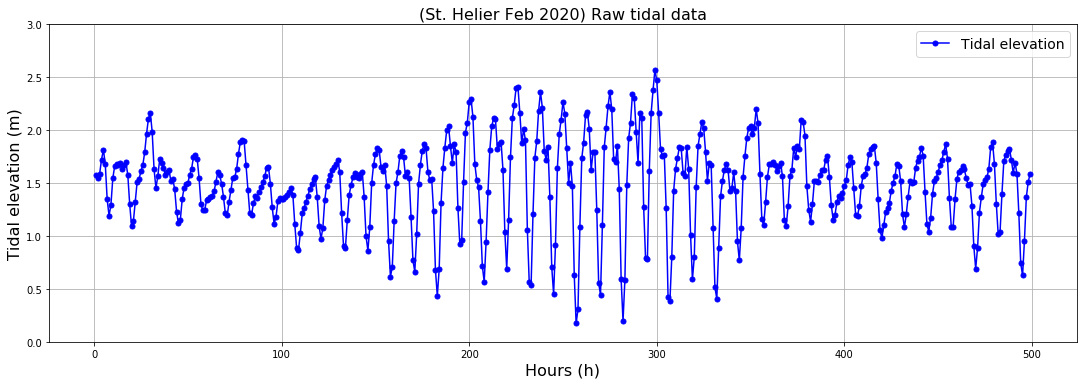

In [17]:
# plot the raw tidal data for (Bournemouth February 2020)

x_list = list_transform_csv(Index, Hour, Elevation, 4, 2000)['Hour']
y_list = list_transform_csv(Index, Hour, Elevation, 4, 2000)['Elevation']

Figure1 = onefigure_plot(0, 3, x_list, y_list, 'bo-', 'Tidal elevation', '(St. Helier Feb 2020) Raw tidal data', True)
print(Figure1)

one figure plot


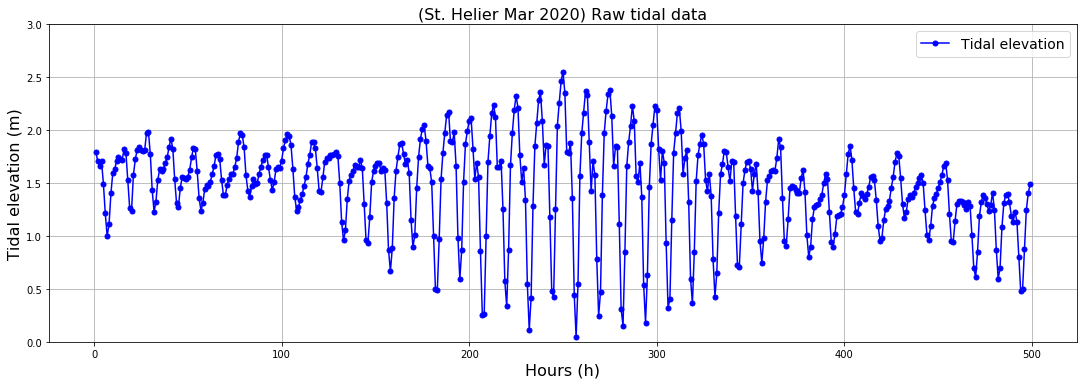

In [18]:
# plot the raw tidal data for (Bournemouth March 2020)

x_list1 = list_transform_csv(Index1, Hour1, Elevation1, 4, 2000)['Hour']
y_list1 = list_transform_csv(Index1, Hour1, Elevation1, 4, 2000)['Elevation']

Figure2 = onefigure_plot(0, 3, x_list1, y_list1, 'bo-', 'Tidal elevation', '(St. Helier Mar 2020) Raw tidal data', True)
print(Figure2)

### 3. Data Processing:

In [19]:
# timescale = 1h
# transform the data list (Bournemouth February 2020) into csv

csv_data = list_transform_csv(Index, Hour, Elevation, 4, 2700)
time_series = data_smooth(csv_data['Elevation'])

one figure plot


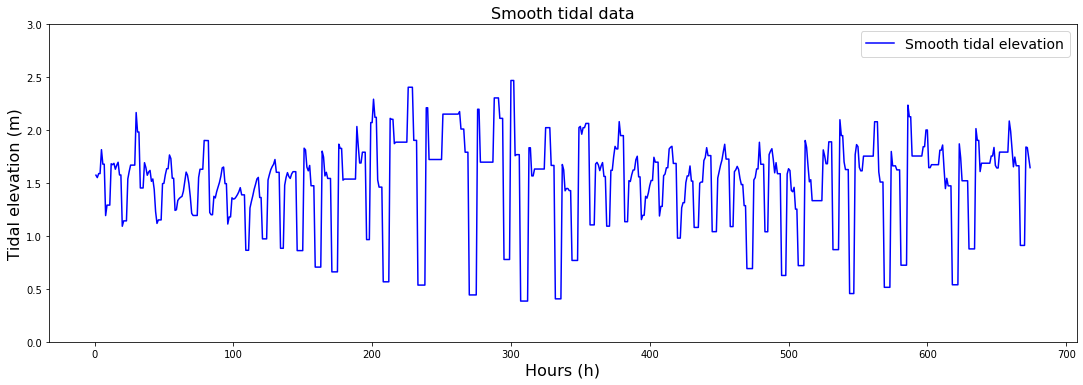

In [20]:
# make the csv data (Bournemouth February 2020) smooth 

data_smooth = onefigure_plot(0, 3, csv_data['Hour'], time_series, 'b', 'Smooth tidal elevation','Smooth tidal data', False)
print(data_smooth)

two figures plot


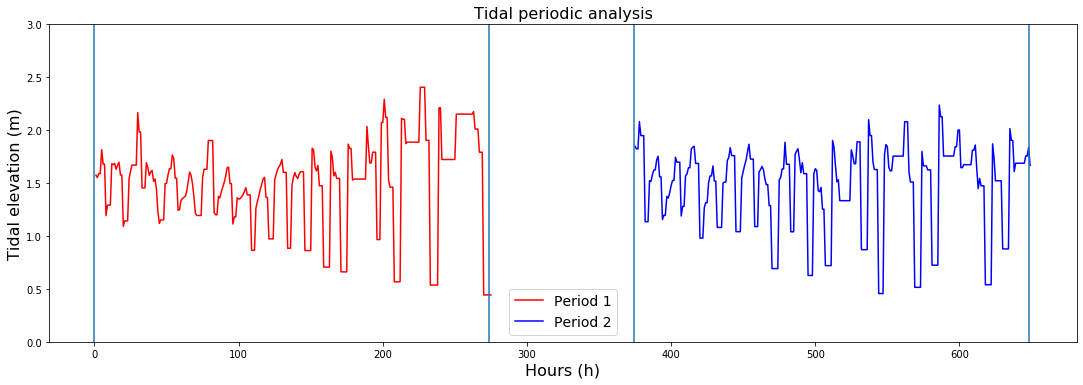

In [21]:
# find subsequences with similar length of period

x_csv = csv_data['Hour'][:275]
y_csv = time_series[:275]

x_csv1 = csv_data['Hour'][374:649]
y_csv1 = time_series[374:649]

Periodic_Analysis = twofigure_plot(0, 3, x_csv, y_csv, 'r', 'Period 1', x_csv1, y_csv1, 'b', 'Period 2', 'Tidal periodic analysis', False)
print(Periodic_Analysis)

plt.axvline(0)
plt.axvline(274)

plt.axvline(374)
plt.axvline(648)

one figure plot


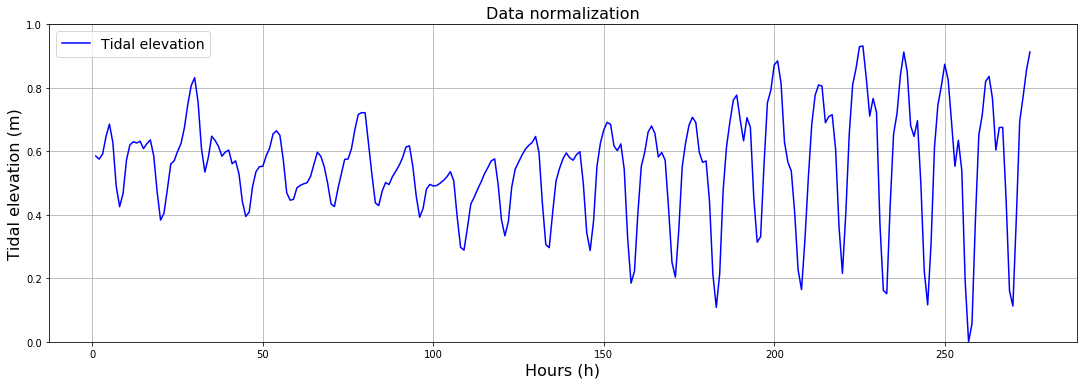

In [22]:
# normalize one of the subsequences

x_nor = csv_data['Hour'][:275]
y_nor = data_normalization(csv_data['Elevation'])[:275]

new_plot = onefigure_plot(0, 1, x_nor, y_nor, 'b', 'Tidal elevation', 'Data normalization', True)
print(new_plot)

### 4. Experimental Method:

In [23]:
# timescale = 1h
# read data from Bournemouth February and March 2020
# transform the data list into csv

data_A = list_transform_csv(Index, Hour, Elevation, 4, 2700)
data_A_elevation = data_A['Elevation']

data_B = list_transform_csv(Index1, Hour1, Elevation1, 4, 2700)
data_B_elevation = data_B['Elevation']

#### 4.1 ARMA BP Nerual Network:

In [24]:
# create input historical sample with first 12 data values

new_data = prediction_historical_sample(data_A_elevation, data_B_elevation, 130, 12)

# create training samples and sample labels
# each sub-training sample has 12 data values and 6 residual values 
# each sub-sample label is the first value after every 12 continuous data values

training_sample, training_label = create_sample_and_label(data_A_elevation, 130, 6, 12, 12, 12, 12, 'true')

In [25]:
# define BP ARMA method

BP_ARMA = BP_Neural_Network()

# use training samples for testing
# define 18 input, 8 hidden and 1 output neurons
# define maximum iteration steps = 10000, learning rate = 0.1, momentum = 0.85, error_convergence = 1e-4

BP_ARMA.test_set(training_sample, training_label, 18, 8, 1, 10000, 0.1, 0.85, 1e-4)

In [26]:
# define normolized prediction list and its length
# input historical sample is the first 12 data values
# use iterative one-step prediction method

normolized_prediction_list, normolized_prediction_length = iteration_prediction_list(BP_ARMA, new_data, len(training_sample), 12, 6, 'true')

# transfer normalized data into actual data

prediction_list, prediction_length = data_transfer(data_A_elevation, normolized_prediction_list)

two figures plot


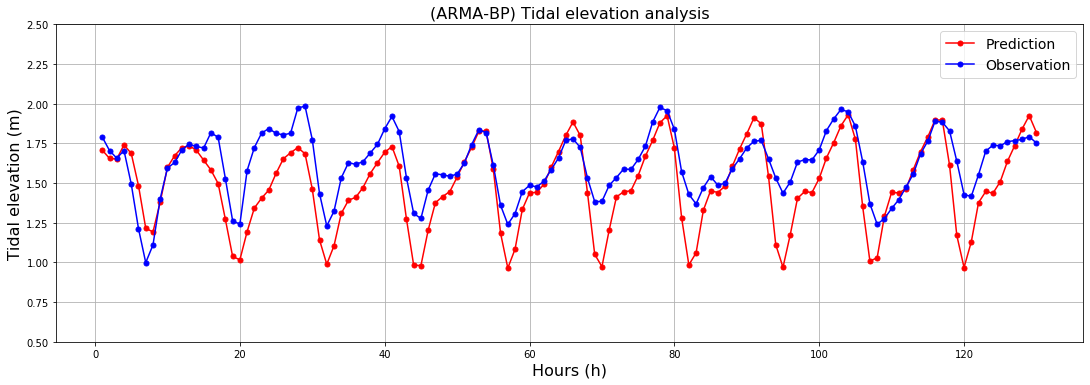

In [27]:
# plot prediction and observation values

x_new_data = data_A['Hour'][:prediction_length]
y_new_data = prediction_list

x_new_data1 = data_B['Hour'][:prediction_length]
y_new_data1 = data_B_elevation[:prediction_length]

ARMA_BP_method = twofigure_plot(0.5, 2.5, x_new_data, y_new_data, 'ro-', 'Prediction', x_new_data1, y_new_data1, 'bo-', 'Observation', '(ARMA-BP) Tidal elevation analysis', True)
print(ARMA_BP_method)

#### 4.2 Non ARMA BP Nerual Network:

In [28]:
# create input historical sample with first 16 data values

new_data2 = prediction_historical_sample(data_A_elevation, data_B_elevation, 130, 16)

# create training samples and sample labels
# each sub-training sample has 8 data values
# each sub-sample label is the first value after every 16 continuous data values

training_sample2, training_label2 = create_sample_and_label(data_A_elevation, 130, 4, 8, 16, 16, 16, 'false')

In [29]:
# define Non BP ARMA method

Non_BP_ARMA = BP_Neural_Network()

# use training samples for testing
# define 8 input, 5 hidden and 1 output neurons
# define maximum iteration steps = 10000, learning rate = 0.05, momentum = 0.8, error_convergence = 1e-4

Non_BP_ARMA.test_set(training_sample2, training_label2, 8, 5, 1, 10000, 0.05, 0.8, 1e-4)

In [30]:
# define normolized prediction list and its length
# input historical sample is the first 16 data values
# use iterative eight-step prediction method

normolized_prediction_list2, normolized_prediction_length2 = iteration_prediction_list(Non_BP_ARMA, new_data2, len(training_sample2), 8, 4, 'false')

# transfer normalized data into actual data

prediction_list2, prediction_length2 = data_transfer(data_A_elevation, normolized_prediction_list2)

two figures plot


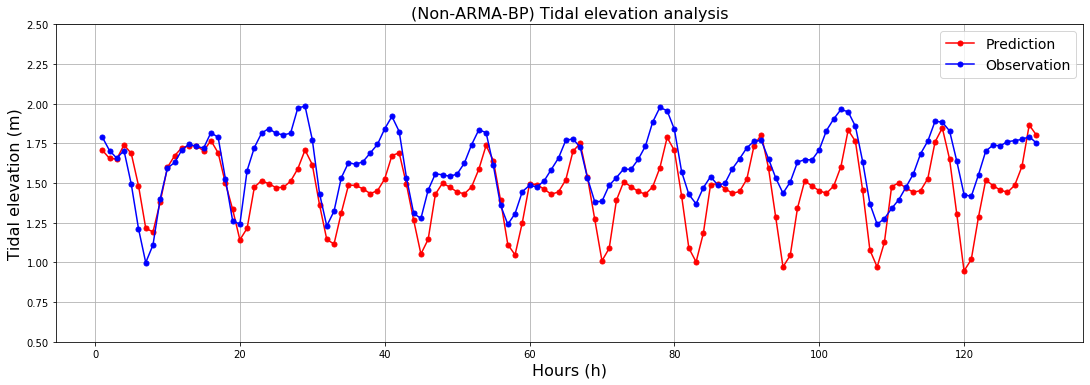

In [31]:
# plot prediction and observation values

x_late_data = data_A['Hour'][:prediction_length2]
y_late_data = prediction_list2

x_late_data1 = data_B['Hour'][:prediction_length2]
y_late_data1 = data_B_elevation[:prediction_length2]

Non_ARMA_BP_method = twofigure_plot(0.5, 2.5, x_late_data, y_late_data, 'ro-', 'Prediction', x_late_data1, y_late_data1, 'bo-', 'Observation', '(Non-ARMA-BP) Tidal elevation analysis', True)
print(Non_ARMA_BP_method)

### 5. Performance Analysis:

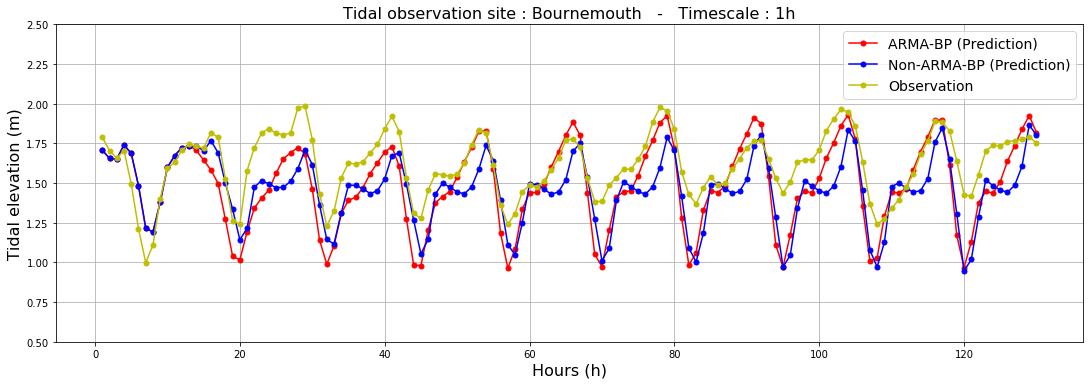

In [32]:
# plot two kinds of prediction and observation values

fig, ax1 = plt.subplots(1, figsize=(15, 5))
fig.tight_layout(w_pad=4)
    
ax1.plot(x_new_data, y_new_data, 'ro-', label = 'ARMA-BP (Prediction)', markersize=5)
ax1.plot(x_late_data, y_late_data, 'bo-', label = 'Non-ARMA-BP (Prediction)', markersize=5)
ax1.plot(x_late_data1, y_late_data1, 'yo-', label = 'Observation', markersize=5)

ax1.set_ylim([0.5, 2.5]);

ax1.set_xlabel('Hours (h)', fontsize=16)
ax1.set_ylabel('Tidal elevation (m)', fontsize=16)
ax1.set_title('Tidal observation site : Bournemouth   -   Timescale : 1h', fontsize=16)
ax1.legend(loc='best', fontsize=14)

ax1.grid(True)

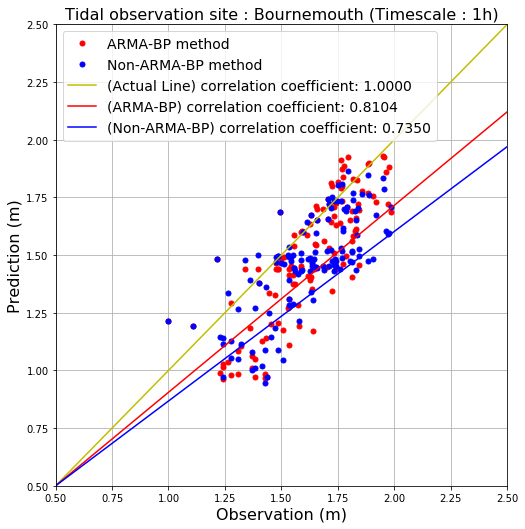

In [33]:
# calculate correlation coefficient of two different methods

method0 = correlation_coefficient(y_new_data1, y_new_data1)
method1 = correlation_coefficient(y_new_data, y_new_data1)
method2 = correlation_coefficient(y_late_data, y_late_data1)

# plot two kinds of prediction and observation values

fig, ax1 = plt.subplots(1, figsize=(7, 7))
fig.tight_layout(w_pad=4)
    
ax1.plot(y_new_data1, y_new_data, 'ro', label = 'ARMA-BP method', markersize=5)
ax1.plot(y_late_data1, y_late_data, 'bo', label = 'Non-ARMA-BP method', markersize=5)

# plot three kinds of correlation coefficient values

x_line = np.linspace(0.5, 2.5, 100)
ax1.plot(x_line, x_line * method0, 'y', label = '(Actual Line) correlation coefficient: {:.4f}'.format(method0), markersize=5)
ax1.plot(x_line, x_line * method1 + 0.5-0.5*method1, 'r', label = '(ARMA-BP) correlation coefficient: {:.4f}'.format(method1), markersize=5)
ax1.plot(x_line, x_line * method2 + 0.5-0.5*method2, 'b', label = '(Non-ARMA-BP) correlation coefficient: {:.4f}'.format(method2), markersize=5)

ax1.set_ylim([0.5, 2.5]);
ax1.set_xlim([0.5, 2.5]);

ax1.set_xlabel('Observation (m)', fontsize=16)
ax1.set_ylabel('Prediction (m)', fontsize=16)
ax1.set_title('Tidal observation site : Bournemouth (Timescale : 1h)', fontsize=16)
ax1.legend(loc='best', fontsize=14)

ax1.grid(True)